In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
mvp = pd.read_csv ('data/MVPdata2000_2021.csv') #interested in TRB
adv_stats = pd.read_csv('data/TeamAdvancedStats2000_2021.csv') #orb, drb, trb
game_stats = pd.read_csv('data/TeamPerGameStats2000_2021.csv') #orb, drb, trb test proportions of each?
merged = pd.merge(adv_stats, game_stats,  how='left', left_on=['Year','Team'], right_on = ['Year','Team'])

In [3]:
merged = merged.dropna()
merged['Win Rate'] = merged['W'] / (merged['W'] + merged['L'])

r2:  0.024157657694447776


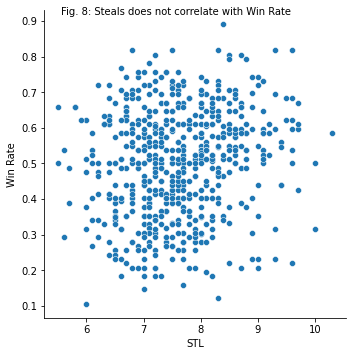

In [4]:
plot = sns.relplot(data=merged, x="STL", y="Win Rate")
plot.fig.suptitle("Fig. 8: Steals does not correlate with Win Rate",
                  fontsize=10, x = 0.5)
x = merged['STL'].values.reshape(-1,1)
y = merged['Win Rate'].values.reshape(-1,1)
lm = LinearRegression()
lm.fit(x, y)
print("r2: ", lm.score(x,y))

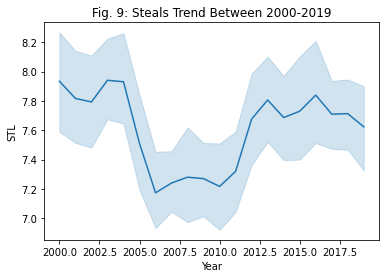

In [5]:
plot = sns.lineplot(data=merged, x="Year", y="STL").set_title('Fig. 9: Steals Trend Between 2000-2019')